## Table of Contents
1. [EDA](#explore)
2. [Feature Engineering](#clean)
3. [Train Test Split](#traintestsplit)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set(style='white', context ='notebook',palette='deep')
%matplotlib inline

In [2]:
df_training = pd.read_csv('data/housingdata/train.csv')
df_test = pd.read_csv('data/housingdata/test.csv')

<a id='explore'></a>

### EDA of the Housing Data

In [3]:
df_training.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [4]:
type(df_training)

pandas.core.frame.DataFrame

In [5]:
df_training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_training.index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df_training.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
print("\nThe training data shape is: {}".format(df_training.shape))
print("The test data shape is: {}".format(df_test.shape))


The training data shape is: (1460, 81)
The test data shape is: (1459, 80)


### Exploring Sale Price

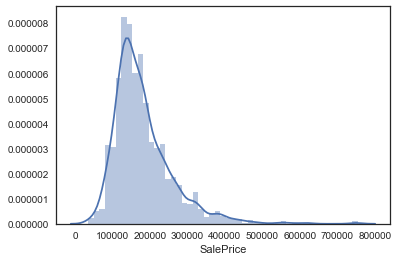

In [10]:
sns.distplot(df_training['SalePrice']);

In [11]:
print("Skew: %f" % df_training['SalePrice'].skew())

# since skew is >0, that means that there is no symmetry in distribution, more skewed to the left

Skew: 1.882876


In [12]:
print("Kurtosis: %f" % df_training['SalePrice'].kurt())

# kurtosis is >0, so there are heavy tails 

Kurtosis: 6.536282


In [13]:
df_training['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Run some scatterplots to determine which numerical variable would affect the Sale Price the most.

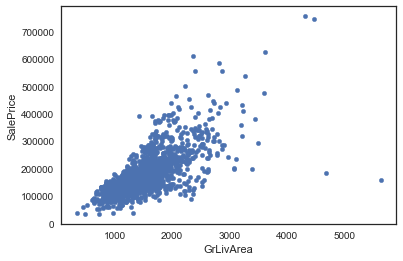

In [14]:
df_training.plot(kind='scatter', x='GrLivArea', y='SalePrice');

In [15]:
print(df_training.corr()['SalePrice']) 

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

#### Use Boxplots to check out categorical variables.

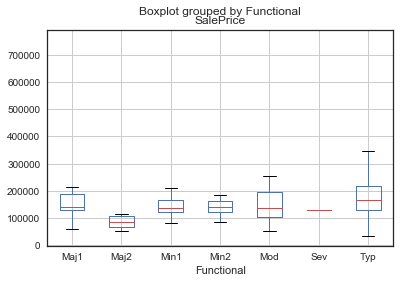

In [16]:
df_training.boxplot(column ='SalePrice',by='Functional');

Based on some quick visualizations, it looks like these variables would determine a high or low SalePrice.
* GrLivArea
* OverallQual
* GarageArea
* Functional

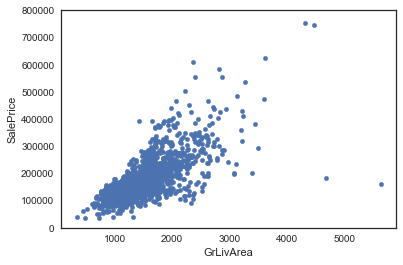

In [17]:
# check out the GrLivArea relationship to SalePrice
var = 'GrLivArea'
rel = pd.concat([df_training['SalePrice'], df_training[var]], axis=1)
rel.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

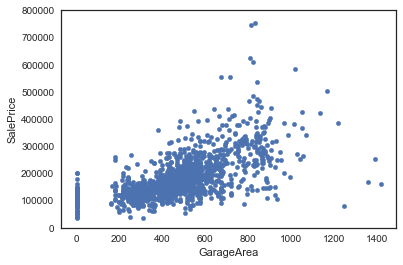

In [18]:
# check out the GarageArea relationship to SalePrice
var = 'GarageArea'
rel = pd.concat([df_training['SalePrice'], df_training[var]], axis=1)
rel.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

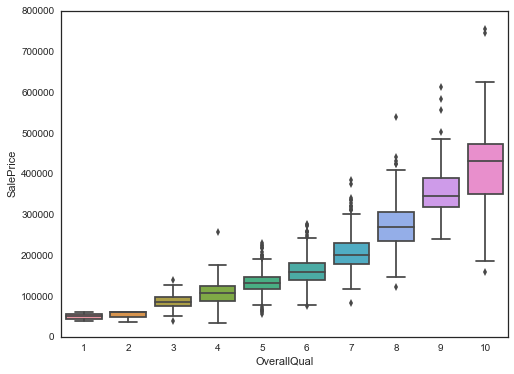

In [19]:
var = 'OverallQual'
data = pd.concat([df_training['SalePrice'], df_training[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var , y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

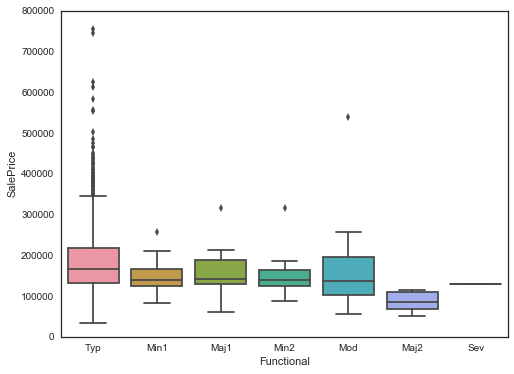

In [20]:
var = 'Functional'
data = pd.concat([df_training['SalePrice'], df_training[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var , y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

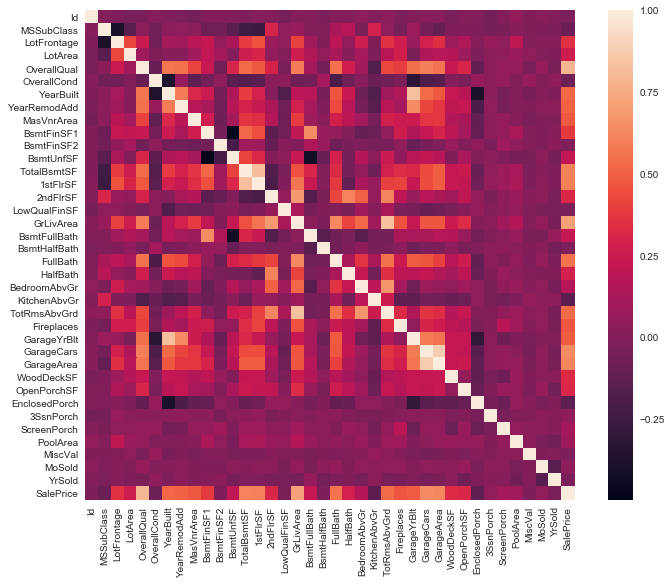

In [21]:
corr_matrix = df_training.corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, square=True);

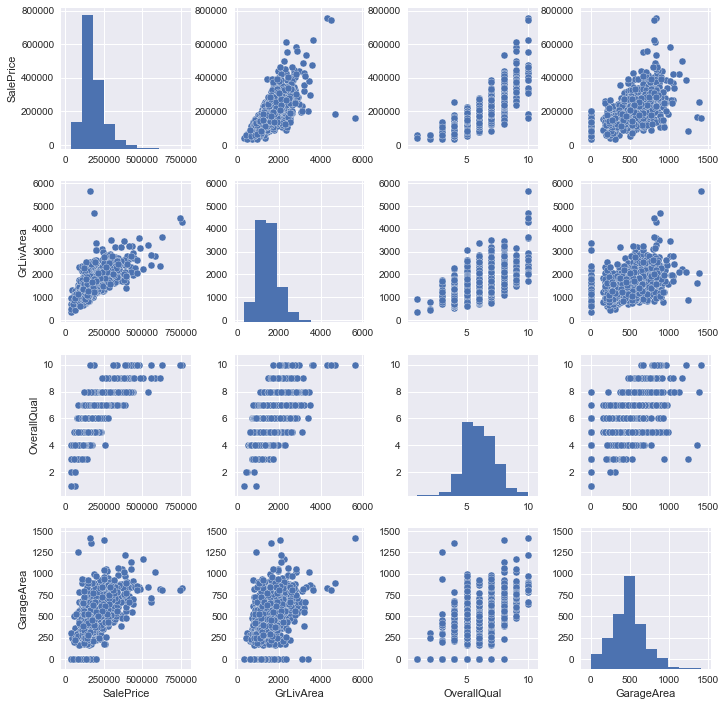

In [22]:
sns.set()
cols = ['SalePrice','GrLivArea','OverallQual','GarageArea','Functional']
sns.pairplot(df_training[cols])
plt.show();

<a id='clean'></a>

### Variable Analysis

In [23]:
# Since ID column is not relevant to analysis, 
# save the ID data in df.
id_train = df_training['Id']
id_test = df_test['Id']

In [24]:
# we will drop ID data from dataset
df_training.drop("Id", axis = 1, inplace= True)
df_test.drop("Id", axis = 1, inplace= True)

In [25]:
print("\nThe training data shape after dropping ID: {}".format(df_training.shape))
print("The test data shape after dropping ID: {}".format(df_test.shape))


The training data shape after dropping ID: (1460, 80)
The test data shape after dropping ID: (1459, 79)


How many categorical / numerical features do we have?

In [26]:
cat = len(df_training.select_dtypes(include=['object']).columns)
num = len(df_training.select_dtypes(exclude=['object']).columns)
print("Total Features: ", cat, "categorical", "+",
      num, "numerical", "=", cat+num, "features")

('Total Features: ', 43, 'categorical', '+', 37, 'numerical', '=', 80, 'features')


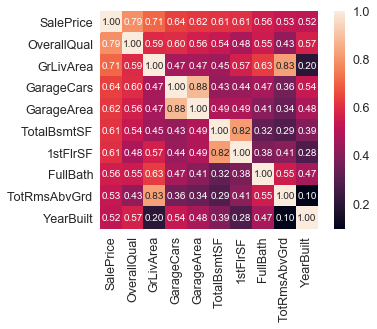

In [27]:
# Heatmap of the top ten variables
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_training[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [28]:
highest_corr = pd.DataFrame(cols)
highest_corr.columns = ['Most Correlated Features']
highest_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Based on the boxplot we did on OverallQual earlier, that proves that SalePrice will correlate with higher OverallQual.

Based on the scatterplot we did on the GrLivArea, there are outliers in the data that we should remove.

In [29]:
# remove outliers in the GrLivArea
df_training = df_training.drop(df_training['GrLivArea'] > 4500).reset_index(drop=True)

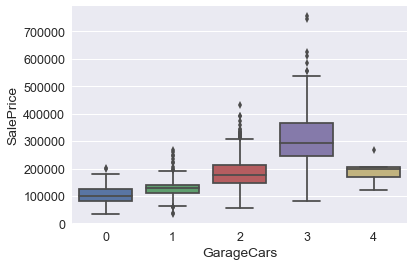

In [30]:
# check out GarageCars correlation to SalePrice
sns.boxplot(x = df_training['GarageCars'], y = df_training['SalePrice'
]);

In [31]:
# Since having more than 3 slots for cars seem to negatively affect sales, remove these outliers
df_training = df_training.drop(df_training[(df_training['GarageCars'] > 3)
                                          & (df_training['SalePrice'] < 300000)].index).reset_index(drop=True)

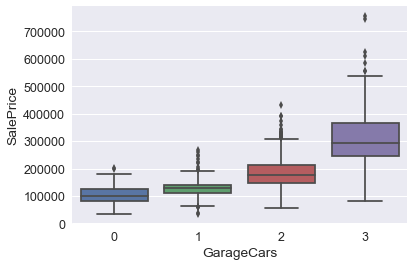

In [32]:
sns.boxplot(x = df_training['GarageCars'], y = df_training['SalePrice'
]);

Based on the GarageArea scatterplot we did earlier, there are a few outliers that we can also remove.

In [33]:
df_training = df_training.drop(df_training[(df_training['GarageArea']>1000) 
                         & (df_training['SalePrice']<300000)].index).reset_index(drop=True)

In [34]:
# Remove houses that are not "normal" sales
sale_condition = df_training.groupby('SaleCondition')
sale_condition['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.00,745000.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.00,127500.0
Alloca,11.0,163839.000000,87645.134465,55993.0,113908.50,142953.0,189812.00,359100.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.00,259000.0
Normal,1189.0,175056.585366,69756.942324,39300.0,130000.00,160000.0,205000.00,755000.0
Partial,122.0,273419.475410,104454.504041,113000.0,193909.25,242300.0,341919.75,611657.0


In [35]:
# only want to deal with "Normal" sales
# df_training = df_training[df_training['SaleCondition']== 'Normal']

### Missing Data

Is there a pattern to the missing data?

In [36]:
# Combine the test and train datasets 
# ntrain = df_training.shape[0]
# ntest = df_test.shape[0]

# y_train = df_training.SalePrice.values
# # train_saleprice = df_training['SalePrice']

# combined_data = pd.concat((df_training, df_test)).reset_index(drop=True)
# # combined_data.drop(['SalePrice'], axis = 1, inplace = True)

# print("Train data size is : {}".format(df_training.shape))
# print("Test data size is : {}".format(df_test.shape))
# print("Combined dataset size is : {}".format(combined_data.shape))

In [37]:
total = df_training.isnull().sum().sort_values(ascending=False)
# total.head()

percent = (df_training.isnull().sum()/df_training.isnull().count()).sort_values(ascending=False)
# percent.head()

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
PoolQC,1441,0.995853
MiscFeature,1394,0.963372
Alley,1357,0.937802
Fence,1167,0.806496
FireplaceQu,685,0.473393
LotFrontage,258,0.178300
GarageType,81,0.055978
GarageCond,81,0.055978
GarageFinish,81,0.055978
GarageQual,81,0.055978


Since there's a bunch of datapoints that are missing, we can be removed from the dataset.

In [38]:
df_training = df_training.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_training = df_training.drop(df_training.loc[df_training['Electrical'].isnull()].index)

df_training.isnull().sum().max()

0

In [39]:
# Engineer new feature, called Property Age
df_training['PropertyAge'] = df_training['YrSold'] - df_training['YearBuilt']

### Fixing Skew

Since the SalePrice data is skewed, use log transformation to make it more normal distributed.

<module 'matplotlib.pyplot' from '/Users/macaroni/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

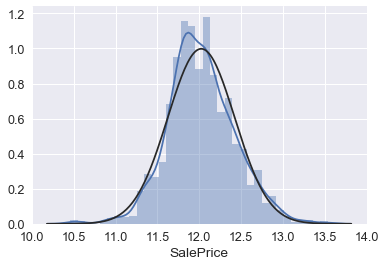

In [40]:
df_training['SalePrice'] = np.log1p(df_training['SalePrice'])
sns.distplot(df_training['SalePrice'] , fit = norm);
plt

Create dummy variables for the categorical data.

In [41]:
categorical_features = df_training.select_dtypes(include = ["object"]).columns

In [42]:
df_cat_features = df_training[categorical_features]

In [43]:
df_cat_features = pd.get_dummies(df_cat_features, drop_first= True)

Combine with the numerical data.

In [44]:
numerical_features = df_training.select_dtypes(exclude= ["object"]).columns

In [45]:
df_num_features = df_training[numerical_features]

In [46]:
df_num_features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,PropertyAge
0,60,11250,7,5,2001,2002,486,0,434,920,...,42,0,0,0,0,0,9,2008,12.317171,7
1,70,9550,7,5,1915,1970,216,0,540,756,...,35,272,0,0,0,0,2,2006,11.849405,91
2,60,14260,8,5,2000,2000,655,0,490,1145,...,84,0,0,0,0,0,12,2008,12.429220,8
3,50,14115,5,5,1993,1995,732,0,64,796,...,30,0,320,0,0,700,10,2009,11.870607,16
4,20,10084,8,5,2004,2005,1369,0,317,1686,...,57,0,0,0,0,0,8,2007,12.634606,3


In [47]:
df_training = pd.concat([df_cat_features, df_num_features], axis = 1)

In [48]:
# df_training = pd.get_dummies(combined_data)
# print("Total size is : {}".format(combined_data.shape))

<a id='traintestsplit'></a>

### Train Test Split

### Building the Linear Model

In [49]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [61]:
def train_test_rmse(df_training, feature_cols):
    X = df_training[feature_cols]
    y = df_training['SalePrice']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [65]:
print(train_test_rmse(df_training, ['GrLivArea','OverallQual','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','YearBuilt','PropertyAge']))

0.16200681359


In [52]:
print(train_test_rmse(df_training, ['MoSold','WoodDeckSF']))

0.374309489886


Decision Trees

In [68]:
#Define X and Y
y = df_training['SalePrice']
house_predictors = ['GrLivArea','OverallQual','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','PropertyAge']
x = df_training[house_predictors]

#Sk-Learn Import
from sklearn.tree import DecisionTreeRegressor

#Define Model
house_model = DecisionTreeRegressor()

#Fit Model
house_model.fit(x, y)

print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(house_model.predict(x.head()))

Making predictions for the following 5 houses:
   GrLivArea  OverallQual  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0       1786            7           2         608          920       920   
1       1717            7           3         642          756       961   
2       2198            8           3         836         1145      1145   
3       1362            5           2         480          796       796   
4       1694            8           2         636         1686      1694   

   PropertyAge  
0            7  
1           91  
2            8  
3           16  
4            3  
The predictions are
[ 12.31717117  11.84940484  12.4292202   11.8706069   12.63460628]
